# import libraries


In [1]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression


# Load dataset

In [2]:
df = pd.read_csv(r'C:\Users\Adler_Sky\Desktop\AB_NYC_2019.csv')

######  در این قسمت داده ها فراخوانی شده اند

# Section 1: Remove missing values

In [5]:
df1 = df.dropna(axis=0, how='any')

###### در این قسمت سطرهایی که در آن ها مقادیر  میسینگ ولیو وجود داشت حذف شده اند

# Section 1: Detect and remove outliers

In [6]:
temp1 = [np.abs(df1[['price', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
-df1[['price', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].mean()) <=
    (3*df1[['price', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].std())]

NoOutlierrows = np.any(np.array(temp1[0]), axis=1)
df2 = df1.iloc[NoOutlierrows,:]

###### در این قسمت ابتدا ستون های زیر را به عنوان مبنای تشخیص پرت بودن هر سطر از داده ها انتخاب کردیم. زیرا باقی ستون ها مقدار عددی مناسبی ندارند:
1)price
2)number_of_reviews
3)reviews_per_month
4)calculated_host_listings_count
5)availability_365
 
 سپس با استفاده تعریف توزیع نرمال و سنجش پراکندگی بیش از 3 برابر از میانگین، رگوردهایی که مقدار آن ها در پارامترهای انتخاب شده بیش از 3 انحراف معیار از میانگین فاصله دارند به عنوان داده پرت شناسایی می شوند 

# Section 2: Overal Information

###### plot count of rooms by neighbourhood group and room type

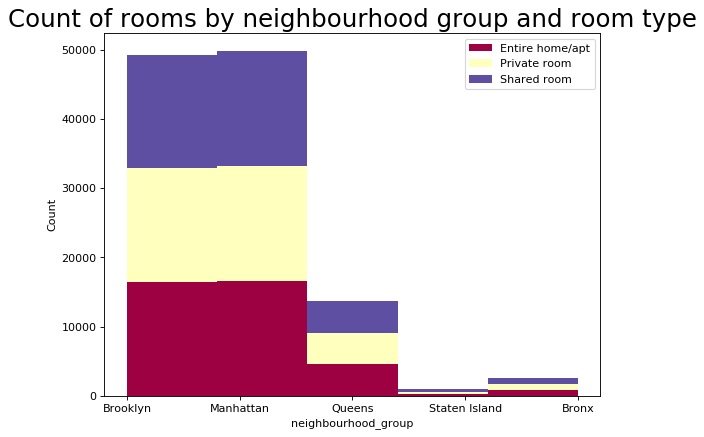

In [7]:
x_var = 'neighbourhood_group'
groupby_var = 'room_type'
df_sh1 = df2.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df2[x_var].values.tolist() for i, df in df_sh1]

plt.figure(figsize=(8,6), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
plt.hist(vals, df2[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Count of rooms by neighbourhood group and room type", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Count")
plt.show()

###### در قسمت بالا فراوانی تعداد آگهی ها در هر منطقه جغرافیایی با تفکیک در نوع منازل مورد آگهی نمایش داده شده است.
موارد زیر را می توان از این شکل نتیجه گیری کرد:
1) فراوانی آگهی ها در منطقه منهتن بیشترین و بعد از نیز منطقه بروکلین است.در حالی که فراوانی آگهی ها در منطقه استیتن ایسلند و برونکس بسیار پایین تر است.
2) اگر از دید نوع منازل بنگریم، هر یک از سه نوع ممکن منازل سهم برابری فراوانی های یک منطقه دارند. 
به عبارت دیگر در هر یک از مناطق سهم هر یک از سه نوع مشخص شده از منازل (آپارتمان-اتاق مستقل-اتاق مشترک) یکسان است
3) تفاوت میان مناطق پر آگهی (منهتن و بروکلین) با مناطق کم آگهی قابل توجه و زیاد است

## plot relationship between minimum nights and price with regard to room_type

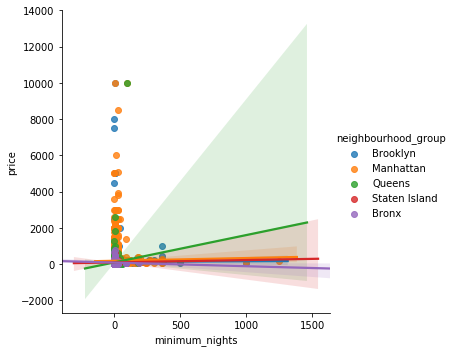

In [6]:
sns.lmplot(x="minimum_nights", y="price", hue="neighbourhood_group", data=df2)


###### در این شکل تلاش شد تا رابطه میان حداقل نصاب تعداد روزهای اجاره با قیمت در هر یک از سه نوع منزل نمایش داده شود. همانطور که در شکل نیز مشخص است، رابطه مشخص و قابل توجهی بین این دو شاخص در هیچ از یک از سه گروه مختلف منزل ها وجود ندارد.

## plot relationship between price and number of reviews with regard to room_type

###### در  شکل بالا نیز تلاش شد تا رابطه میان قیمت و تعداد نظرات ثبت شده در هر یک از سه نوع منزل نمایش داده شود.
آنچنان که مشخص است رابطه قوی و قابل توجهی میان قیمت و تعداد نظرات نیز وجود ندارد. تنها در گروه منازل اجاره آپارتمان مقداری رابطه متوسط و منفی مشاهده می شود. گویی در این گروه از مسائل علاقه به قیمت پایین بیشتر بوده است.

## در دو شکل  زیر تلاش شد تا دیدی کلی از پراکندگی و تمرکز شاخص های قیمت و تعداد نظرات در هر یک از مناطق جغرافیایی ارائه شود 

## Density Plot of price in each neighbourhood group

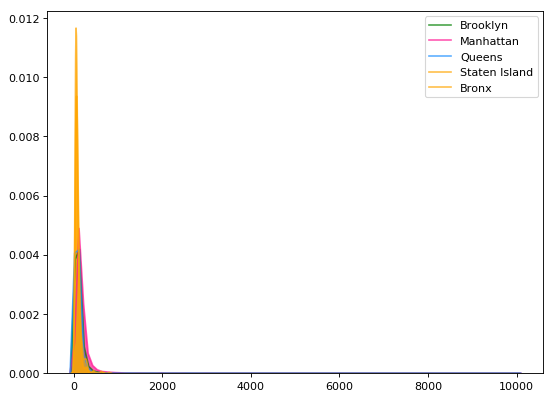

In [7]:
plt.figure(figsize=(8,6), dpi= 80)
sns.kdeplot(df2.loc[df2['neighbourhood_group'] == 'Brooklyn', "price"], shade=True, color="g", label="Brooklyn", alpha=.7)
sns.kdeplot(df2.loc[df2['neighbourhood_group'] == 'Manhattan', "price"], shade=True, color="deeppink", label="Manhattan", alpha=.7)
sns.kdeplot(df2.loc[df2['neighbourhood_group'] == 'Queens', "price"], shade=True, color="dodgerblue", label="Queens", alpha=.7)
sns.kdeplot(df2.loc[df2['neighbourhood_group'] == 'Staten Island', "price"], shade=True, color="orange", label="Staten Island", alpha=.7)
sns.kdeplot(df2.loc[df2['neighbourhood_group'] == 'Bronx', "price"], shade=True, color="orange", label="Bronx", alpha=.7)


###### شکل قبل توزیع چگالی قیمت را در هر یک از مناطق جغرافیایی نمایش می دهد. کاملا مشخص است میانگین قیمت در تمام مناطق یکان است. پراکندگی قسمت اندکی تفاوت دارد

## Density Plot of review count in each neighbourhood group

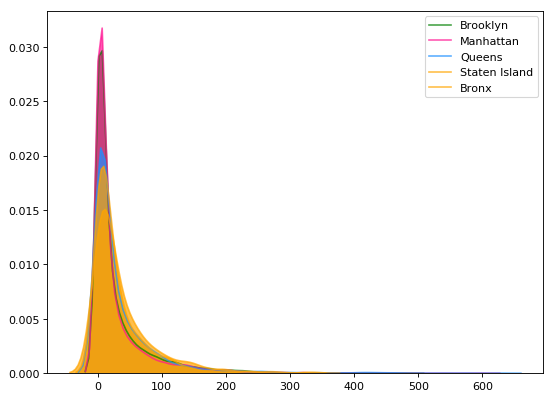

In [8]:
plt.figure(figsize=(8,6), dpi= 80)
sns.kdeplot(df2.loc[df2['neighbourhood_group'] == 'Brooklyn', "number_of_reviews"], shade=True, color="g", label="Brooklyn", alpha=.7)
sns.kdeplot(df2.loc[df2['neighbourhood_group'] == 'Manhattan', "number_of_reviews"], shade=True, color="deeppink", label="Manhattan", alpha=.7)
sns.kdeplot(df2.loc[df2['neighbourhood_group'] == 'Queens', "number_of_reviews"], shade=True, color="dodgerblue", label="Queens", alpha=.7)
sns.kdeplot(df2.loc[df2['neighbourhood_group'] == 'Staten Island', "number_of_reviews"], shade=True, color="orange", label="Staten Island", alpha=.7)
sns.kdeplot(df2.loc[df2['neighbourhood_group'] == 'Bronx', "number_of_reviews"], shade=True, color="orange", label="Bronx", alpha=.7)


###### از شکل توزع های چگالی بالا برداشت می شود که تعداد نظرات در هر یک از مناطق جغرافیایی از الگوی مختلفی پیروی می کند.
میانگین قیمتها در بروکلین و منهتن بیشتر از بقیه مناطق بوده و از نظر پراکندگی نیز بروکلین بیشترین پراکندگی و منهتن کمترین پراکندگی را دارد

# Section 3: Show announcement owners and their frequencies

##  در این بخش تعداد نامهای یکتا در صاحبان آگهی شناسایی و نمایش داده می شوند. سپس، به دلیل محدودیت نمایش، در دو شکل به ترتیب فراوانی آگهی های 20 نفر اول و 20 نفر دوم (با بیشترین آگهی ها) نمایش داده می شوند

In [27]:
print('Number of unique names: ', df2['host_name'].unique().__len__())
df_raw = df2[['host_name']].groupby('host_name').apply(lambda x: x.shape[0])


Number of unique names:  9885
host_name
'Cil                        1
(Ari) HENRY LEE             1
(Email hidden by Airbnb)    5
(Mary) Haiy                 1
-TheQueensCornerLot         1
                           ..
美德                          5
诗月                          1
青明                          5
빈나                          1
소정                          1
Length: 9885, dtype: int64


###### همانطور که مشخص است، تعداد 9885 نام مستقل به عنوان صاحبان آگهی مشاهده شده است

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

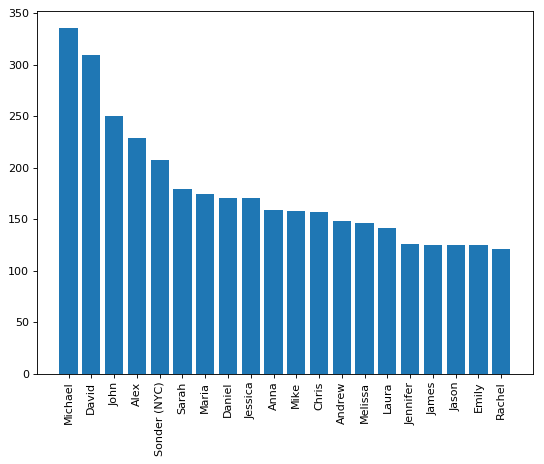

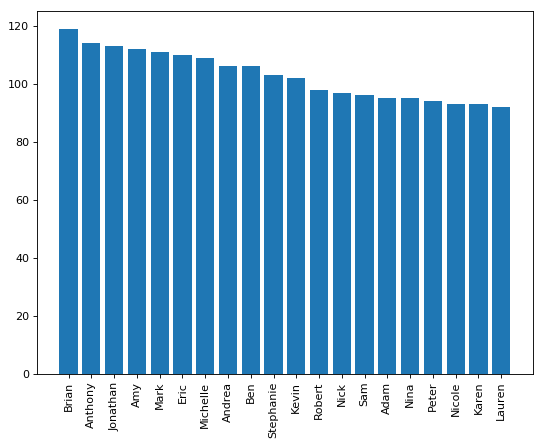

In [10]:
df_raw1 = df_raw.sort_values(axis=0, ascending=False)
plt.figure(figsize=(8,6), dpi= 80)
plt.bar(df_raw1.index[0:20], df_raw1.values[0:20])
plt.xticks(rotation='vertical')

plt.figure(figsize=(8,6), dpi= 80)
plt.bar(df_raw1.index[20:40], df_raw1.values[20:40])
plt.xticks(rotation='vertical')

###### همچنین، در دو شکل بالا مشخص است که بیشترین فراوانی از آگهی ها با تعداد 335 متعلق به فردی به نام میشل است. طیف فراوانی آگهی ها در میان 40 نفر با بیشترین آگهی ثبت شده از 335 تا 100 متغیر است

# Section 4: Find persons with most costumers and analyze its reasons

###### در این قسمت ما از تحلیل همبستگی برای تشخیص میزان ارتباط میان تعداد کامنتهای ثبت شده با دو عامل عددی فیمت و دردسترس بودن استفاده کرده ایم.

طبیعتا، ابتدا نامهای یکتا را شناسایی کرده و سپس نام ها را براساس اعداد آگهی های آن ها سورت کرده ایم.
سپس، همبستگی میان دو عامل قیمت و در دسترس بودن را در 20 نفر اول از نظر تعداد آگهی ها سنجیدیم

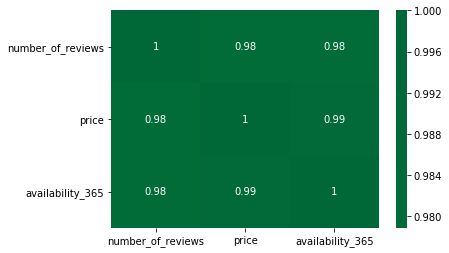

In [8]:
df_raw2 = df2[['number_of_reviews', 'host_name', 'room_type', 'price', 'neighbourhood_group', 'availability_365']].groupby('host_name').apply(lambda x: x.sum())
df_raw3 = df_raw2.sort_values('number_of_reviews', axis=0, ascending=False)

sns.heatmap(df_raw3.loc[::30,:].corr(), xticklabels=df_raw3.loc[::30,:].corr().columns, yticklabels=df_raw3.loc[::30,:].corr().columns, cmap='RdYlGn', center=0, annot=True)



###### همانطور که در شکل بالا مشخص است، همبستگی 98 درصدی میان دو عامل قیمت و در دسترس پذیری و تعداد پیامهای ارسال شده به 30 نفر دارای بیشترین مشتری وجود دارد.
به عبارت دیگر، همبستگی و ارتباز بالایی میان این عوامل و تعداد مشتری مشتری وجود دارد.
برای نمایش نوع این ارتباط از ترسیم دو نمادر اسکتر زیر استفاده شده است:
    

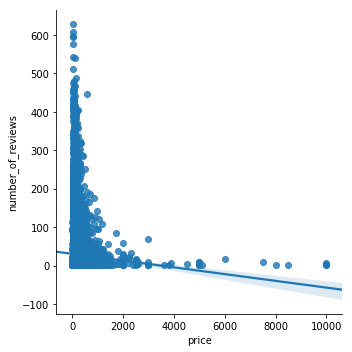

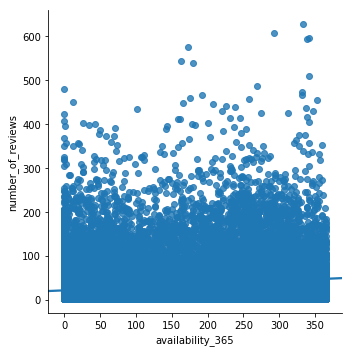

In [12]:
df_raw4 = df_raw3.loc[::30,:]
sns.lmplot(x="price", y="number_of_reviews", data=df2)
sns.lmplot(x="availability_365", y="number_of_reviews", data=df2)

###### به صورت واضح در دو شکل بالا مشاهده می شود که تعداد مشتری با قیمت رابطه معکوس داشته و با در دسترس پذیری رابطه مستقیم دارد.

# Section 5: Five statistical tests

###### در این بخش 5 آزمون فرض مختلف روی مجموعه داده اعمال می شود.

آزمون فرض اول بررسی نرمال بودن تعداد پیام ها یا همان تعداد مشتریان است. در این آزمون فرض صفر و فرض مخالف به صورت زیر هستند:
    

##### Shapiro-Wilk Test
H0: Number_of_reviews has a Gaussian (normal) distribution.

H1: Number_of_reviews does not have a Gaussian (normal) distribution.

In [13]:
stat, p = shapiro(df2['number_of_reviews'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.610, p=0.000


C:\Users\Milad\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


###### بر اساس مقدار p-value
تعداد مشتریان از توزیع نرمال پیروی نمی کند

## در گام دوم از آزمون همبستگی پیرسون برای سنجش معناداری ارتباط میان تعداد مشتریان و دو عامل قیمت و در دسترسپذیری استفاده کرده ایم. 

### اولین آزمون:
H0: Number_of_reviews and price are independent.

H1: There is a dependency between number_of_reviews and price.

In [14]:
stat, p = pearsonr(df2['number_of_reviews'], df2['price'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=-0.036, p=0.000


###### با توجه به نتیجه آزمون و مقدار p_value=0
همبستگی میان دو متغیر بالا تایید می شود و این دو متغیر در عمل به هم مربوطند

### دومین آزمون:
H0: Number_of_reviews and availability_365 are independent.

H1: There is a dependency between number_of_reviews and availability_365.

In [15]:
stat, p = pearsonr(df2['number_of_reviews'], df2['availability_365'])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.193, p=0.000


#### با توجه به نتیجه آزمون و مقدار p_value=0
همبستگی میان دو متغیر تعداد مشتری و در دسترسپذیری نیز تایید می شود و این دو متغیر در عمل به هم مربوطند

## Analysis of Variance Test (ANOVA)
در آرمون فرض سوم از آزمون آنووا
برای سنجش همسانی میان قیمت در مناطق مختلف جغرافیایی استفاده کردیم. 

### در این آزمون فرض صفر و فرض مخالف به صورت زیرند:
H0: the means of the samples are equal.

H1: one or more of the means of the samples are unequal        

In [16]:

stat, p = f_oneway(df2.loc[df2['neighbourhood_group'] == 'Manhattan', "price"], 
                   df2.loc[df2['neighbourhood_group'] == 'Brooklyn', "price"],
                   df2.loc[df2['neighbourhood_group'] == 'Queens', "price"],
                   df2.loc[df2['neighbourhood_group'] == 'Staten Island', "price"],
                   df2.loc[df2['neighbourhood_group'] == 'Bronx', "price"]
                  )
print('stat=%.3f, p=%.3f' % (stat, p))

stat=299.117, p=0.000


###### نتیحه آزمون برابری میانگین قیمتها در پنج منطقه جغرافیایی را تایید نمیکند. به عبارت دیگر قیمتها در 5 نقطه جغرافیایی مختلفند

## ودر آزمون فرض نهایی با استفاده از آزمون خی دو به بررسی ارتباط بین  پرداختیم.
    

#### در این آزمون فرض وجود ارتباط معنی دار میان دو متغیر با ماهیت غیرعددی منطقه جغرافیایی و نوع اتاق با متغیر هدف تعداد مشتریان سنجیده می شود. در ابتدا ارتباط میان متغیر منطقه جغرافیایی و تعداد مشتریان:
    

##### فرض صفر و فرض مخالف:
H0: Neighbourhood_group and number_of_reviews are independent.

H1: There is a dependency between Neighbourhood_group and number_of_reviews.

In [17]:
stat, p, dof, expected = chi2_contingency([df2['number_of_reviews'].values.tolist(), pd.factorize(df2['neighbourhood_group'])[0].tolist()])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=212716.219, p=0.000


###### با توجه به مقدار p-value
    حاصله فرض صفر آزمون بالا تایید نشده و در نتیجه وابستگی ای میان دو متغیر منطقه جغرافیایی و تعداد مشتریان وجود دارد. به عبارت دیگر، منطقه جغرافیایی در تعداد مشتریان تاثیرگذار است

#### فرض صفر و فرض مخالف:
H0: Neighbourhood_group and number_of_reviews are independent.

H1: There is a dependency between Neighbourhood_group and room_type.

In [18]:
stat, p, dof, expected = chi2_contingency([df2['number_of_reviews'].values.tolist(), pd.factorize(df2['room_type'])[0].tolist()])
print('stat=%.3f, p=%.3f' % (stat, p))

stat=177074.821, p=0.000


###### در اینجا نیز با توجه به مقدار p-value
    حاصله فرض صفر آزمون بالا تایید نشده و در نتیجه وابستگی ای میان دو متغیر منطقه جغرافیایی و تعداد مشتریان وجود دارد. به عبارت دیگر، نوع اتاق یا منزل در تعداد مشتریان تاثیرگذار است

# Section 6: Forecast price and number of reviews

### First forecast price using multiple linear regression

In [9]:
df2['room_type'] = pd.factorize(df2['room_type'])[0] 
df2['neighbourhood_group'] = pd.factorize(df2['neighbourhood_group'])[0]

###### در خطوط بالا متغیرهای متنی به حالت عددی کدگذاری شده اند

In [10]:
Y1 = df2['price']
Y2 = df2['number_of_reviews']
X = df2.drop(labels=['id','name', 'host_id', 'host_name', 'reviews_per_month', 'neighbourhood', 'longitude', 'last_review', 'price', 'number_of_reviews'] ,axis=1)

 در خطوط بالا متغیرهای ورودی و خروجی تعیین شده اند

### ساخت مدل رگرسیونی برای پیش بینی قیمت:

In [21]:

MLR = LinearRegression().fit(X, Y1)

Pipeline(steps=[('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [13]:
print(X.columns)

Index(['neighbourhood_group', 'latitude', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [12]:
print(MLR.coef_)


[-1.17123240e+01  2.27862531e+02  8.51171786e+01 -7.49887039e-03
  1.79360053e-01  1.21959807e-01]


###### ضرایب مدل رگرسیون فیت شده روی داده ها میزان تاثیر هر یک از متغیرهای ورودی را روی قیمت نشان می دهد.
بر این اساس، در میان متغیرهای مختلف موجود در دیتاست
latitude                            
و
room_type
و 
neighbourhood_group
دارای بیشترین تاثیر و اهمیت در ساختن مدل پیش بینی قیمت بوده اند

### ساخت مدل رگرسیونی برای پیش بینی تعداد مشتری:

In [14]:
MLR = LinearRegression().fit(X, Y2)


In [15]:
print(MLR.coef_)
print(X.columns)

[-0.30977897  1.24290268 -1.44087565 -0.23274646 -0.16951436  0.08170939]
Index(['neighbourhood_group', 'latitude', 'room_type', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


###### با توجه به ضرایب نهایی حاصله از فیت کردن مدل رگرسیون
اینچنین برداشت می شود که از یان متغیرهای مستقل، بیشترین اهمیت را 
latitude 
و
calculated_host_listings_count
و
room_type
دارند

# Section 7: Analyze relation between gender and price/costumer

### در این بخش ابتدا مجموعه داده شامل نامها فراخوانی می شود:

In [23]:
df_names = pd.read_csv(r'G:\Files\My Python Projects\Data analysis\Part1\name_gender_dataset.csv')


In [ ]:
df_temp = df['host_name']
NameClasses = []
for i in range(len(df['host_name'])):
    temp = df_temp.loc[i]
    ans = df_names.loc[df_names['Name']==temp, 'Gender'].values
    if df_names.loc[df_names['Name']==temp, 'Gender'].values.shape[0]==0:   
        NameClasses.append(2)
    elif ans[0]=='F':
        NameClasses.append(1)
    elif ans[0]=='M':
        NameClasses.append(2)

### سپس از آزمون خی دو برای بررسی ارتباط میان جنسیت و قیمت استفاده کردیم

In [ ]:
stat, p, dof, expected = chi2_contingency([NameClasses, pd.factorize(df2['price'])[0].tolist()])
print('stat=%.3f, p=%.3f' % (stat, p))

###### stat=299.117, p=0.000

### همچنین از آزمون خی دو برای بررسی ارتباط میان جنسیت و تعداد مشتریان استفاده کردیم

In [ ]:
stat, p, dof, expected = chi2_contingency([NameClasses, pd.factorize(df2['number_of_reviews'])[0].tolist()])
print('stat=%.3f, p=%.3f' % (stat, p))

###### stat=431.237, p=0.000

In [ ]:
همانطور که مشخص است، ارتباط میان جنسیت با دو عامل قیمت و تعداد مشتری نیز تایید شده است.